# Прогнозирование конечных свойств новых материалов (композиционных материалов)

<p style='text-align: right;'> Подготовила <b>Шевченко Виктория Николаевна</b>&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;</p>
<p style='text-align: right;'> Слушательница курса "Аналитик данных" Образовательного центра МГТУ им. Н.Э.Баумана</p>

*Описание*

Композиционные материалы — это искусственно созданные материалы, состоящие из нескольких других с четкой границей между ними. Композиты обладают теми свойствами, которые не наблюдаются у компонентов по отдельности. Цель исследования - спрогнозировать характеристики композита на основе данных о характеристиках входящих компонентов (связующего и армирующего компонента).

На входе имеются данные о начальных свойствах компонентов композиционных материалов (количество связующего, наполнителя, температурный режим отверждения и т.д.). На выходе необходимо спрогнозировать ряд конечных свойств получаемых композиционных материалов, а именно: модуль упругости при растяжении (ГПа), модуль упругости (ГПа), соотношение матрица-наполнитель.

Актуальность: Созданные прогнозные модели помогут сократить количество проводимых испытаний, а также пополнить базу данных материалов возможными новыми характеристиками материалов, и цифровыми двойниками новых композитов.


## Содержание

1. [Первичный анализ набора данных и предобработка](#pre-processing)
2. [Исследовательский анализ данных](#EDA)
3. [Обучение моделей](#machine_learning)
    * 3.1 [Подготовка к обучению](#pre-model)
    * 3.2 [Градиентный бустинг](#lgbm)
    * 3.3 [Линейная регрессия](#linear)
    * 3.4 [Случайный лес](#forest)
    * 3.4 [Нейронная сеть](#neural)
4. [Вывод](#conclusion)

## Первичный анализ набора данных и предобработка <a id="pre-processing"></a>

Импортируем необходимые библиотеки:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
import lightgbm as lgb

import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Normalization
from tensorflow.keras.optimizers import Adam


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df1 = pd.read_excel('C:/Downloads/dataset/case_2/X_bp.xlsx', index_col=[0])

In [4]:
df1

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


таргет - модуль упругости при растяжении, прочность при растяжении, соотношение матрица-наполнитель

In [5]:
df2 = pd.read_excel('C:/Downloads/dataset/case_2/X_nup.xlsx', index_col=[0])

In [6]:
df2

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,4.000000,57.000000
1,0,4.000000,60.000000
2,0,4.000000,70.000000
3,0,5.000000,47.000000
4,0,5.000000,57.000000
...,...,...,...
1035,90,8.088111,47.759177
1036,90,7.619138,66.931932
1037,90,9.800926,72.858286
1038,90,10.079859,65.519479


In [7]:
data = df1.join(df2, how = 'inner')

In [8]:
data

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


Целевыми признаками являются следующие признаки: 'Модуль упругости при растяжении, ГПа', 'модуль упругости, ГПа', 'Соотношение матрица-наполнитель'. Переместим их для удобства в правый край таблицы:

In [9]:
data = data[['Плотность, кг/м3',
             'Количество отвердителя, м.%',
             'Содержание эпоксидных групп,%_2',
             'Температура вспышки, С_2',
             'Поверхностная плотность, г/м2',
             'Прочность при растяжении, МПа',
             'Потребление смолы, г/м2',
             'Угол нашивки, град',
             'Шаг нашивки',
             'Плотность нашивки',
             'Модуль упругости при растяжении, ГПа',
             'модуль упругости, ГПа',
             'Соотношение матрица-наполнитель'
]]

In [10]:
data

,"Плотность, кг/м3","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,"Модуль упругости при растяжении, ГПа","модуль упругости, ГПа",Соотношение матрица-наполнитель
0,2030.000000,30.000000,22.267857,100.000000,210.000000,3000.000000,220.000000,0,4.000000,57.000000,70.000000,738.736842,1.857143
1,2030.000000,50.000000,23.750000,284.615385,210.000000,3000.000000,220.000000,0,4.000000,60.000000,70.000000,738.736842,1.857143
2,2030.000000,49.900000,33.000000,284.615385,210.000000,3000.000000,220.000000,0,4.000000,70.000000,70.000000,738.736842,1.857143
3,2030.000000,129.000000,21.250000,300.000000,210.000000,3000.000000,220.000000,0,5.000000,47.000000,70.000000,738.736842,1.857143
4,2030.000000,111.860000,22.267857,284.615385,210.000000,3000.000000,220.000000,0,5.000000,57.000000,70.000000,753.000000,2.771331
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,1952.087902,86.992183,20.123249,324.774576,209.198700,2387.292495,125.007669,90,9.076380,47.019770,73.090961,912.855545,2.271346
1019,2050.089171,145.981978,19.599769,254.215401,350.660830,2360.392784,117.730099,90,10.565614,53.750790,72.920827,444.732634,3.444022
1020,1972.372865,110.533477,23.957502,248.423047,740.142791,2662.906040,236.606764,90,4.161154,67.629684,74.734344,416.836524,3.280604
1021,2066.799773,141.397963,19.246945,275.779840,641.468152,2071.715856,197.126067,90,6.313201,58.261074,74.042708,741.475517,3.705351


In [11]:
data.describe()

,"Плотность, кг/м3","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,"Модуль упругости при растяжении, ГПа","модуль упругости, ГПа",Соотношение матрица-наполнитель
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,1975.734888,110.570769,22.244390,285.882151,482.731833,2466.922843,218.423144,44.252199,6.899222,57.153929,73.328571,739.923233,2.930366
std,73.729231,28.295911,2.406301,40.943260,281.314690,485.628006,59.735931,45.015793,2.563467,12.350969,3.118983,330.231581,0.913222
min,1731.764635,17.740275,14.254985,100.000000,0.603740,1036.856605,33.803026,0.000000,0.000000,0.000000,64.054061,2.436909,0.389403
25%,1924.155467,92.443497,20.608034,259.066528,266.816645,2135.850448,179.627520,0.000000,5.080033,49.799212,71.245018,500.047452,2.317887
50%,1977.621657,110.564840,22.230744,285.896812,451.864365,2459.524526,219.198882,0.000000,6.916144,57.341920,73.268805,739.664328,2.906878
75%,2021.374375,129.730366,23.961934,313.002106,693.225017,2767.193119,257.481724,90.000000,8.586293,64.944961,75.356612,961.812526,3.552660
max,2207.773481,198.953207,33.000000,413.273418,1399.542362,3848.436732,414.590628,90.000000,14.440522,103.988901,82.682051,1911.536477,5.591742


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Плотность, кг/м3                      1023 non-null   float64
 1   Количество отвердителя, м.%           1023 non-null   float64
 2   Содержание эпоксидных групп,%_2       1023 non-null   float64
 3   Температура вспышки, С_2              1023 non-null   float64
 4   Поверхностная плотность, г/м2         1023 non-null   float64
 5   Прочность при растяжении, МПа         1023 non-null   float64
 6   Потребление смолы, г/м2               1023 non-null   float64
 7   Угол нашивки, град                    1023 non-null   int64  
 8   Шаг нашивки                           1023 non-null   float64
 9   Плотность нашивки                     1023 non-null   float64
 10  Модуль упругости при растяжении, ГПа  1023 non-null   float64
 11  модуль упругости,

Проверим на наличие дубликатов:

In [13]:
print('Найдено дубликатов: ', data.duplicated().sum())

Найдено дубликатов:  0


## Исследовательский анализ данных <a id="EDA"></a>

Построим гистограммы распределения и диаграмму размаха для каждого из признаков. Исключим признак "Угол нашивки" - в нём только два значения: 0 и 90 градусов. Для этого признака построим countplot, чтобы оценить сбалансированность.

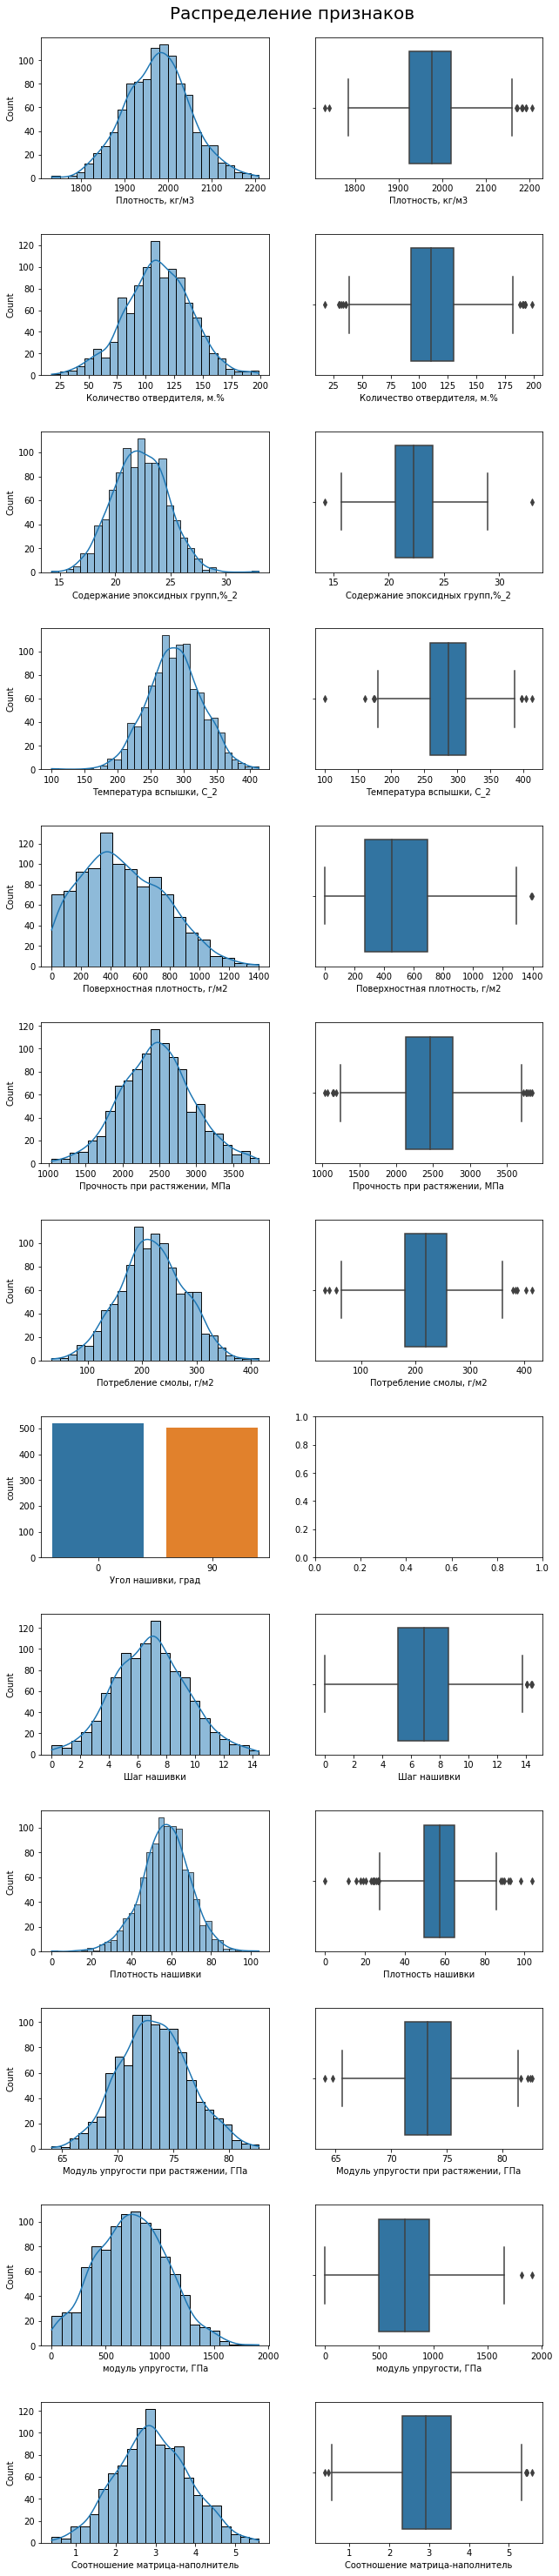

In [14]:
fig, axs = plt.subplots(13, 2, figsize=(10, 50))
sns.countplot(ax=axs[7, 0], x=data.iloc[:, 7])
for i in [x for x in range(len(list(data.columns))) if x != 7]:
    sns.histplot(ax=axs[i, 0], x=data.iloc[:, i], kde=True)
    sns.boxplot(ax=axs[i, 1], x=data.iloc[:, i])

fig.suptitle('Распределение признаков', fontsize=20, y=0.91)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    hspace=0.4);

Признаки в основном распределены нормально или почти нормально.

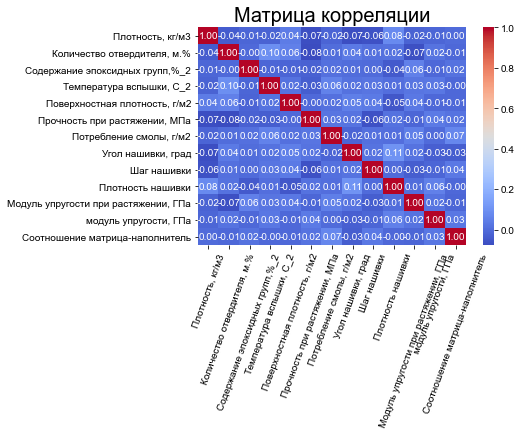

In [15]:
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap = sns.color_palette('coolwarm', as_cmap=True))
plt.xticks(rotation=70)
plt.title('Матрица корреляции', fontsize=20)
sns.set(rc={'figure.figsize':(20,20)});

Ни один из признаков друг с другом не коррелирует.

## Обучение моделей <a id="machine_learning"></a>

### Подготовка к обучению <a id="pre-model"></a> 

Разделим выборку на обучающую и тестовую:

In [16]:
X = data.iloc[:, :-3]
y = data.iloc[:, -3:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 12345)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(818, 10)
(818, 3)
(205, 10)
(205, 3)


In [17]:
y_train

,"Модуль упругости при растяжении, ГПа","модуль упругости, ГПа",Соотношение матрица-наполнитель
168,72.342025,1190.019606,2.386868
598,78.698346,283.346896,2.165756
366,68.784661,757.357275,1.165743
411,71.838552,472.313295,1.273273
195,70.673985,1223.046935,3.012998
...,...,...,...
420,75.726919,608.028345,3.638699
129,77.094895,686.269535,1.746458
285,74.017914,369.448793,3.864766
485,75.743315,582.802386,3.833344


Сохраним в разные векторы целевые признаки:

In [18]:
y_train_1 = np.array(y_train.iloc[:,0])
y_test_1 = np.array(y_test.iloc[:,0])
y_train_2 = np.array(y_train.iloc[:,1])
y_test_2 = np.array(y_test.iloc[:,1])
y_train_3 = np.array(y_train.iloc[:,2])
y_test_3 = np.array(y_test.iloc[:,2])

Обучим константные модели и сделаем предсказания:

In [19]:
print('Значения метрик для константной модели')
print()
dummy = DummyRegressor(strategy='mean')
dummy_rmse = []
dummy_r2 = []
for i in range(0, 3):
    dummy.fit(X_train, np.array(y_train.iloc[:,i]))
    dummy_pred = dummy.predict(X_test)
    rmse = mean_squared_error(np.array(y_test.iloc[:,i]), dummy_pred) ** 0.5
    r2 = r2_score(np.array(y_test.iloc[:,i]), dummy_pred)
    dummy_rmse.append(rmse)
    dummy_r2.append(r2)
    print(i+1, 'целевой признак')
    print('RMSE: {:.3f}'.format(dummy_rmse[i]))
    print('R2: {:.3f}'.format(dummy_r2[i]))
    print()

Значения метрик для константной модели

1 целевой признак
RMSE: 3.429
R2: -0.013

2 целевой признак
RMSE: 317.413
R2: -0.000

3 целевой признак
RMSE: 0.953
R2: -0.002



При обучении моделей мы будем стремиться превзойти результаты константной модели.

### Градиентный бустинг <a id="lgbm"></a> 

Подберём параметры для модели градиентного бустинга Light GBM с помощью GridSearch. Для предотвращения утечки данных при кросс-валидации с масштабированными данными, используем Pipeline:

In [20]:
pipe_lgbm = Pipeline([
        ('scaler', StandardScaler()),
        ('lgbm', lgb.LGBMRegressor(random_state=12345))
])

params_lgbm = [{
    'lgbm__num_leaves' : [x for x in range(1, 51, 5)],
    'lgbm__learning_rate' : [0.2, 0.03, 0.003],
    'lgbm__max_depth' : [x for x in range(1, 10)],
    'lgbm__n_estimators' : [x for x in range(1, 25, 3)]
}]

In [21]:
gs_lgbm = GridSearchCV(pipe_lgbm, params_lgbm, scoring = 'neg_mean_squared_error', cv=5, verbose=0)
gs_lgbm.fit(X_train, y_train_1)
print('Лучшие гиперпараметры:', gs_lgbm.best_params_)
print()
print('Среднее значение RMSE модели lgbm после кросс-валидации: {:.2f}'.format((abs(gs_lgbm.best_score_))**0.5))

Лучшие гиперпараметры: {'lgbm__learning_rate': 0.2, 'lgbm__max_depth': 2, 'lgbm__n_estimators': 7, 'lgbm__num_leaves': 6}

Среднее значение RMSE модели lgbm после кросс-валидации: 3.03


Обучим и проверим на тестовой выборке модель с наилучшими гиперпараметрами:

In [22]:
%%time

lgbm_model = Pipeline([
    ('scaler', StandardScaler()),
    ('lgbm', lgb.LGBMRegressor(learning_rate = 0.003,
                               max_depth = 2,
                               n_estimators = 7,
                               num_leaves = 6,
                               random_state=12345))
])

lgbm_model.fit(X_train, y_train_1)

Wall time: 17 ms


Pipeline(steps=[('scaler', StandardScaler()),
                ('lgbm',
                 LGBMRegressor(learning_rate=0.003, max_depth=2, n_estimators=7,
                               num_leaves=6, random_state=12345))])

In [23]:
pred_1 = lgbm_model.predict(X_test)
rmse1_lgbm = mean_squared_error(y_test_1, pred_1) ** 0.5
print('Значение RMSE для целевого признака №1 модели lgbm на тестовой выборке: {:.3f}'.format(rmse1_lgbm))

Значение RMSE для целевого признака №1 модели lgbm на тестовой выборке: 3.428


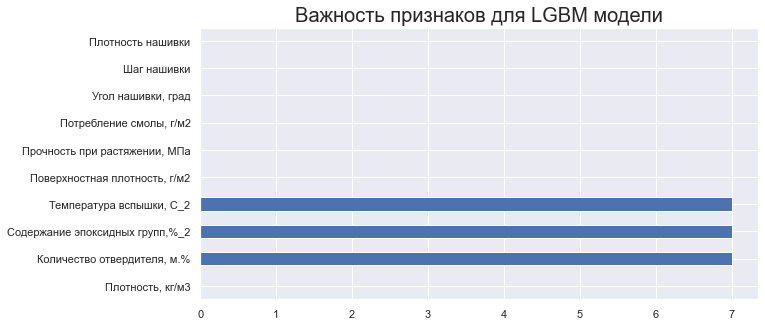

In [24]:
lgbm_importances = pd.Series(lgbm_model.steps[1][1].feature_importances_, index=data.columns[0:10])

lgbm_importances.plot.barh(figsize=(10,5))
plt.title("Важность признаков для LGBM модели", fontsize=20);

Попробуем обучить модель только на наиболее важных признаках:

In [25]:
main_1 = ['Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2']
X_train[main_1]

,"Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2"
168,115.237068,24.486534,298.128902
598,51.225363,24.539248,288.473012
366,103.806542,18.637128,307.629517
411,93.290977,16.704108,212.833056
195,118.501894,21.539608,351.657840
...,...,...,...
420,106.780903,22.259406,262.399852
129,106.704606,20.575594,263.362796
285,138.699165,21.909672,276.393919
485,70.786717,24.874901,340.848860


In [26]:
gs_lgbm.fit(X_train[main_1], y_train_1)
print('Лучшие гиперпараметры:', gs_lgbm.best_params_)
print()
print('Среднее значение RMSE модели lgbm после кросс-валидации: {:.2f}'.format((abs(gs_lgbm.best_score_))**0.5))

Лучшие гиперпараметры: {'lgbm__learning_rate': 0.2, 'lgbm__max_depth': 3, 'lgbm__n_estimators': 10, 'lgbm__num_leaves': 11}

Среднее значение RMSE модели lgbm после кросс-валидации: 3.00


In [27]:
%%time

lgbm_model = Pipeline([
    ('scaler', StandardScaler()),
    ('lgbm', lgb.LGBMRegressor(learning_rate = 0.003,
                               max_depth = 2,
                               n_estimators = 22,
                               num_leaves = 6,
                               random_state=12345))
])

lgbm_model.fit(X_train[main_1], y_train_1)

pred_1 = lgbm_model.predict(X_test[main_1])
rmse_lgbm = mean_squared_error(y_test_1, pred_1) ** 0.5
print('Значение RMSE для целевого признака №1 модели lgbm на тестовой выборке: {:.3f}'.format(rmse_lgbm))

Значение RMSE для целевого признака №1 модели lgbm на тестовой выборке: 3.428
Wall time: 22.9 ms


Результат: метрики немного улучшились при кросс-валидации, но не изменились на тестовой выборке.

Подберём гиперпараметры и обучим модель для предсказания второго целевого признака:

In [28]:
gs_lgbm.fit(X_train, y_train_2)
print('Лучшие гиперпараметры:', gs_lgbm.best_params_)
print()
print('Среднее значение RMSE модели lgbm после кросс-валидации: {:.2f}'.format((abs(gs_lgbm.best_score_))**0.5))

Лучшие гиперпараметры: {'lgbm__learning_rate': 0.003, 'lgbm__max_depth': 2, 'lgbm__n_estimators': 1, 'lgbm__num_leaves': 6}

Среднее значение RMSE модели lgbm после кросс-валидации: 333.35


При проверке на тестовой выборке попробуем увеличить количество решателей:

In [29]:
%%time

lgbm_model = Pipeline([
    ('scaler', StandardScaler()),
    ('lgbm', lgb.LGBMRegressor(learning_rate = 0.003,
                               max_depth = 2,
                               n_estimators = 22,
                               num_leaves = 6,
                               random_state=12345))
])

lgbm_model.fit(X_train, y_train_2)

pred_2 = lgbm_model.predict(X_test)
rmse2_lgbm = mean_squared_error(y_test_2, pred_2) ** 0.5
print('Значение RMSE для целевого признака №2 модели lgbm на тестовой выборке: {:.2f}'.format(rmse2_lgbm))

Значение RMSE для целевого признака №2 модели lgbm на тестовой выборке: 317.38
Wall time: 30.9 ms


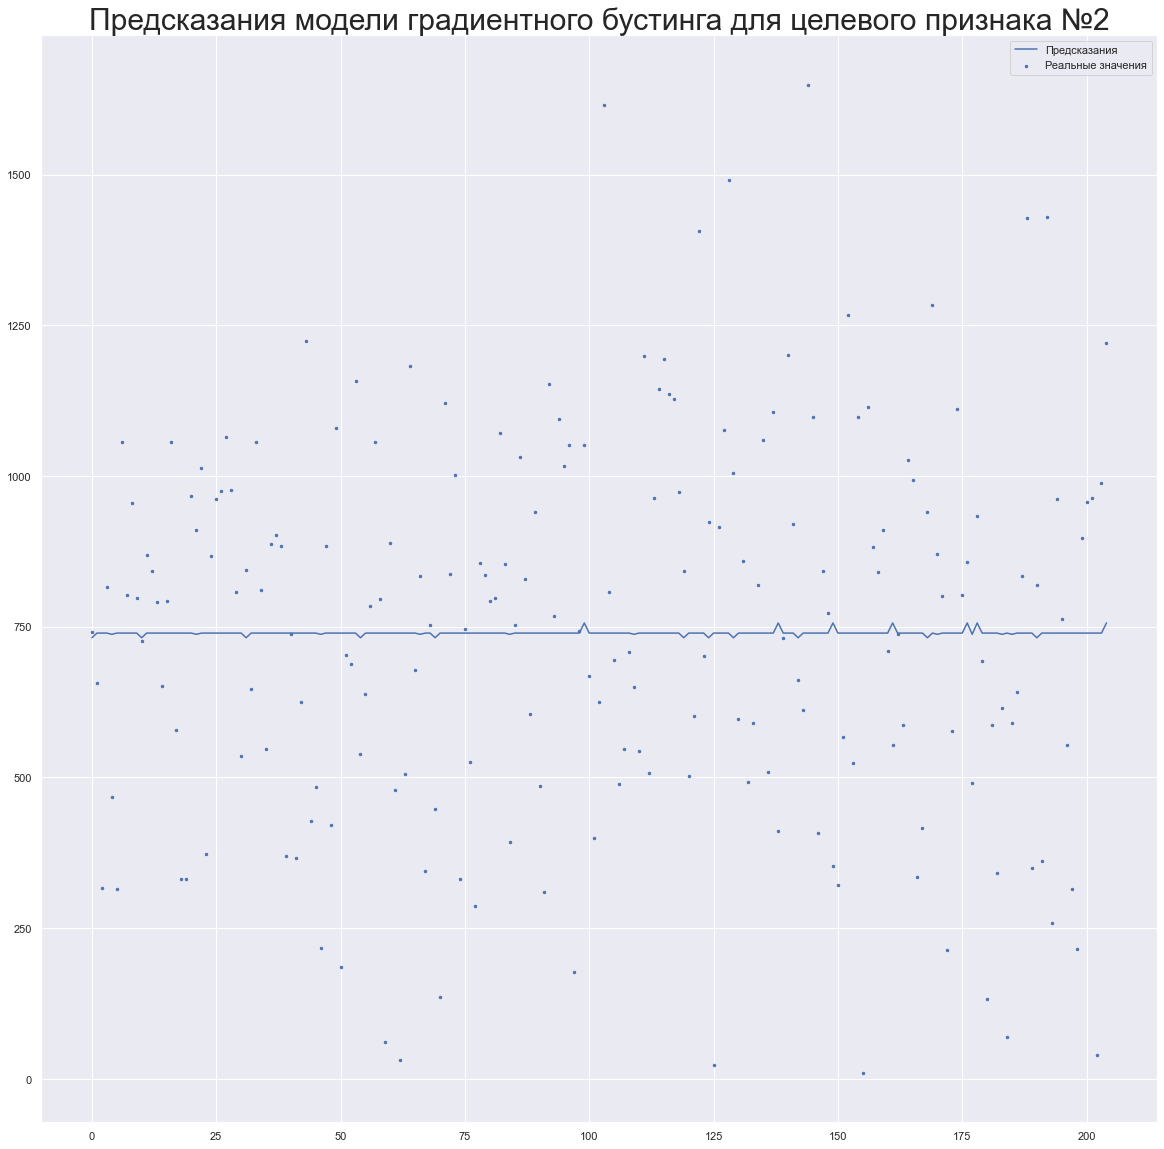

In [105]:
x_ax = range(len(X_test))
plt.scatter(x_ax, y_test_2,  s=6, label="Реальные значения")
plt.plot(x_ax, pred_2, label="Предсказания")


plt.legend()
plt.title('Предсказания модели градиентного бустинга для целевого признака №2', fontsize=30);

In [31]:
gs_lgbm.fit(X_train, y_train_3)
print('Лучшие гиперпараметры:', gs_lgbm.best_params_)
print()
print('Среднее значение RMSE модели lgbm после кросс-валидации: {:.2f}'.format((abs(gs_lgbm.best_score_))**0.5))

Лучшие гиперпараметры: {'lgbm__learning_rate': 0.2, 'lgbm__max_depth': 6, 'lgbm__n_estimators': 1, 'lgbm__num_leaves': 11}

Среднее значение RMSE модели lgbm после кросс-валидации: 0.90


In [116]:
%%time

lgbm_model = Pipeline([
    ('scaler', StandardScaler()),
    ('lgbm', lgb.LGBMRegressor(learning_rate = 0.02,
                               max_depth = 6,
                               n_estimators = 1,
                               num_leaves = 11,
                               random_state=12345))
])

lgbm_model.fit(X_train, y_train_3)

pred_3 = lgbm_model.predict(X_test)
rmse3_lgbm = mean_squared_error(y_test_3, pred_3) ** 0.5
print('Значение RMSE для целевого признака №3 модели lgbm на тестовой выборке: {:.3f}'.format(rmse3_lgbm))

Значение RMSE для целевого признака №3 модели lgbm на тестовой выборке: 0.953
Wall time: 14.9 ms


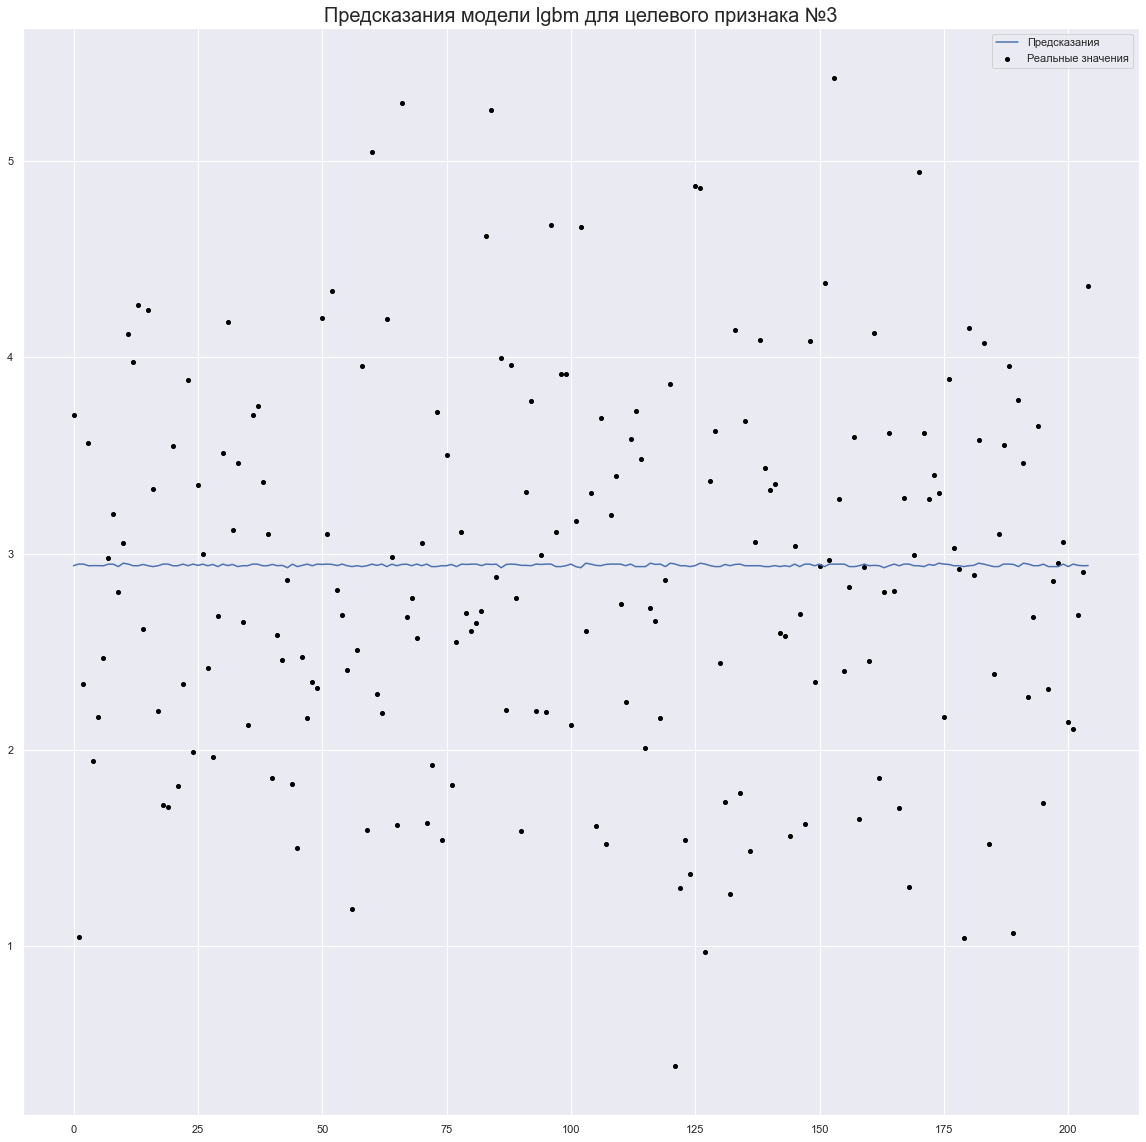

In [118]:
x_ax = range(len(X_test))
plt.scatter(x_ax, y_test_3, s=16, color='black', label="Реальные значения")
plt.plot(x_ax, pred_3, label="Предсказания")


plt.legend()
plt.title('Предсказания модели lgbm для целевого признака №3', fontsize=20);

### Линейная регрессия <a id="linear"></a> 

In [33]:
linear_model = Pipeline([
    ('scaler', StandardScaler()),
    ('linear', LinearRegression())
])

linear_model.fit(X_train, y_train_1)

Pipeline(steps=[('scaler', StandardScaler()), ('linear', LinearRegression())])

In [34]:
ypred_1 = linear_model.predict(X_test)
rmse_lr1 = mean_squared_error(y_test_1, ypred_1) ** 0.5
print('Значение RMSE для целевого признака №1 модели линейной регрессии на тестовой выборке: {:.2f}'.format(rmse_lr1))

Значение RMSE для целевого признака №1 модели линейной регрессии на тестовой выборке: 3.48


In [35]:
linear_model.fit(X_train, y_train_2)
ypred_2 = linear_model.predict(X_test)
rmse_lr2 = mean_squared_error(y_test_2, ypred_2) ** 0.5
print('Значение RMSE для целевого признака №2 модели линейной регрессии на тестовой выборке: {:.2f}'.format(rmse_lr2))

Значение RMSE для целевого признака №2 модели линейной регрессии на тестовой выборке: 316.49


In [36]:
linear_model.fit(X_train, y_train_3)
ypred_3 = linear_model.predict(X_test)
rmse_lr3 = mean_squared_error(y_test_3, ypred_3) ** 0.5
print('Значение RMSE для целевого признака №3 модели линейной регрессии на тестовой выборке: {:.2f}'.format(rmse_lr3))

Значение RMSE для целевого признака №3 модели линейной регрессии на тестовой выборке: 0.97


Линейная регрессия показывает наилучший результат при предсказании целевого признака №2.

### Случайный лес <a id="forest"></a> 

In [37]:
pipe_forest = Pipeline([('scaler', StandardScaler()),
                        ('forest', RandomForestRegressor(random_state=12345))])

params_forest = [{
    'forest__bootstrap': [True],
    'forest__criterion': ['mse'],
    'forest__max_depth' : [1, 2, 3, 5, 8, 10],
    'forest__n_estimators' : [x for x in range(1, 30, 3)]
}]


forest_gs = GridSearchCV(pipe_forest, params_forest, 'neg_mean_squared_error', cv=5, verbose=0)
forest_gs.fit(X_train, y_train_1)

print('Лучшие параметры:')
print(forest_gs.best_params_)
print('Среднее значение RMSE модели случайного леса после кросс-валидации: {:.2f}'.format(
    (abs(forest_gs.best_score_))**0.5))

Лучшие параметры:
{'forest__bootstrap': True, 'forest__criterion': 'mse', 'forest__max_depth': 1, 'forest__n_estimators': 7}
Среднее значение RMSE модели случайного леса после кросс-валидации: 3.03


In [38]:
forest_model = RandomForestRegressor(
    bootstrap=True,
    criterion='mse',
    max_depth=1,
    n_estimators=7,
    random_state=12345
)

forest_model.fit(X_train, y_train_1)
forest_y1pred = forest_model.predict(X_test)
rmse1_forest = (mean_squared_error(forest_y1pred, y_test_1)) ** 0.5
print('Значение RMSE для целевого признака №1 модели случайного леса на тестовой выборке: {:.2f}'.format(rmse1_forest))

Значение RMSE для целевого признака №1 модели случайного леса на тестовой выборке: 3.46


In [39]:
forest_gs = GridSearchCV(pipe_forest, params_forest, 'neg_mean_squared_error', cv=5, verbose=0)
forest_gs.fit(X_train, y_train_2)

print('Лучшие параметры:')
print(forest_gs.best_params_)
print('Среднее значение RMSE модели случайного леса после кросс-валидации: {:.2f}'.format(
    (abs(forest_gs.best_score_))**0.5))

Лучшие параметры:
{'forest__bootstrap': True, 'forest__criterion': 'mse', 'forest__max_depth': 1, 'forest__n_estimators': 10}
Среднее значение RMSE модели случайного леса после кросс-валидации: 334.58


In [40]:
forest_model = RandomForestRegressor(
    bootstrap=True,
    criterion='mse',
    max_depth=1,
    n_estimators=10,
    random_state=12345
)

forest_model.fit(X_train, y_train_2)
forest_y2pred = forest_model.predict(X_test)
rmse2_forest = (mean_squared_error(forest_y2pred, y_test_2)) ** 0.5
print('Значение RMSE для целевого признака №2 модели случайного леса на тестовой выборке: {:.2f}'.format(rmse2_forest))

Значение RMSE для целевого признака №2 модели случайного леса на тестовой выборке: 318.10


In [41]:
forest_gs = GridSearchCV(pipe_forest, params_forest, 'neg_mean_squared_error', cv=5, verbose=0)
forest_gs.fit(X_train, y_train_3)

print('Лучшие параметры:')
print(forest_gs.best_params_)
print('Среднее значение RMSE модели случайного леса после кросс-валидации: {:.2f}'.format(
    (abs(forest_gs.best_score_))**0.5))

Лучшие параметры:
{'forest__bootstrap': True, 'forest__criterion': 'mse', 'forest__max_depth': 2, 'forest__n_estimators': 13}
Среднее значение RMSE модели случайного леса после кросс-валидации: 0.90


In [42]:
forest_model = RandomForestRegressor(
    bootstrap=True,
    criterion='mse',
    max_depth=2,
    n_estimators=13,
    random_state=12345
)

forest_model.fit(X_train, y_train_3)
forest_y3pred = forest_model.predict(X_test)
rmse3_forest = (mean_squared_error(forest_y3pred, y_test_3)) ** 0.5
print('Значение RMSE для целевого признака №3 модели случайного леса на тестовой выборке: {:.2f}'.format(rmse3_forest))

Значение RMSE для целевого признака №3 модели случайного леса на тестовой выборке: 0.96


## Нейронная сеть <a id="neural"></a> 

Предскажем с помощью нейронной сети все три целевых признака:

In [75]:
in_dim = X_train.shape[1]
out_dim = y_train.shape[1]

In [76]:
optimizer = Adam(0.0002)

model = Sequential()
model.add(Dense(100, input_dim=in_dim, activation="relu"))
model.add(Dense(out_dim))
model.compile(loss="mse", optimizer=optimizer)

In [84]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [85]:
ypred_neuro = model.predict(X_test)
ypred_neuro.shape

7/7 [==============================] - 0s 999us/step


(205, 3)

In [86]:
rmse_neuro1 = (mean_squared_error(ypred_neuro[:, 0], y_test_1)) ** 0.5
print('Значение RMSE для целевого признака №1 модели нейронной сети на тестовой выборке: {:.2f}'.format(rmse_neuro1))

Значение RMSE для целевого признака №1 модели нейронной сети на тестовой выборке: 4.11


In [87]:
rmse_neuro2 = (mean_squared_error(ypred_neuro[:, 1], y_test_2)) ** 0.5
print('Значение RMSE для целевого признака №2 модели нейронной сети на тестовой выборке: {:.2f}'.format(rmse_neuro2))

Значение RMSE для целевого признака №2 модели нейронной сети на тестовой выборке: 2.57


In [88]:
rmse_neuro3 = (mean_squared_error(ypred_neuro[:, 2], y_test_3)) ** 0.5
print('Значение RMSE для целевого признака №3 модели нейронной сети на тестовой выборке: {:.2f}'.format(rmse_neuro3))

Значение RMSE для целевого признака №3 модели нейронной сети на тестовой выборке: 1.53


Нейронная сеть не превзошла градиентный бустинг по точности предсказаний для первого и третьего целевого признака, но значительно превзошла для второго - попробуем обучить нейронную сеть предсказывать только его:

In [101]:
in_dim = X_train.shape[1]

optimizer = Adam(0.0002)

model = Sequential()
model.add(Dense(100, input_dim=in_dim, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer=optimizer)

model.fit(X_train, y_train_2, epochs=100, verbose=0)

y2pred_neuro = model.predict(X_test)
rmse2_neuro = (mean_squared_error(y2pred_neuro, y_test_2)) ** 0.5
print('Значение RMSE для целевого признака №2 модели нейронной сети на тестовой выборке: {:.2f}'.format(rmse2_neuro))

7/7 [==============================] - 0s 1ms/step
Значение RMSE для целевого признака №1 модели нейронной сети на тестовой выборке: 5.67


Построим график:

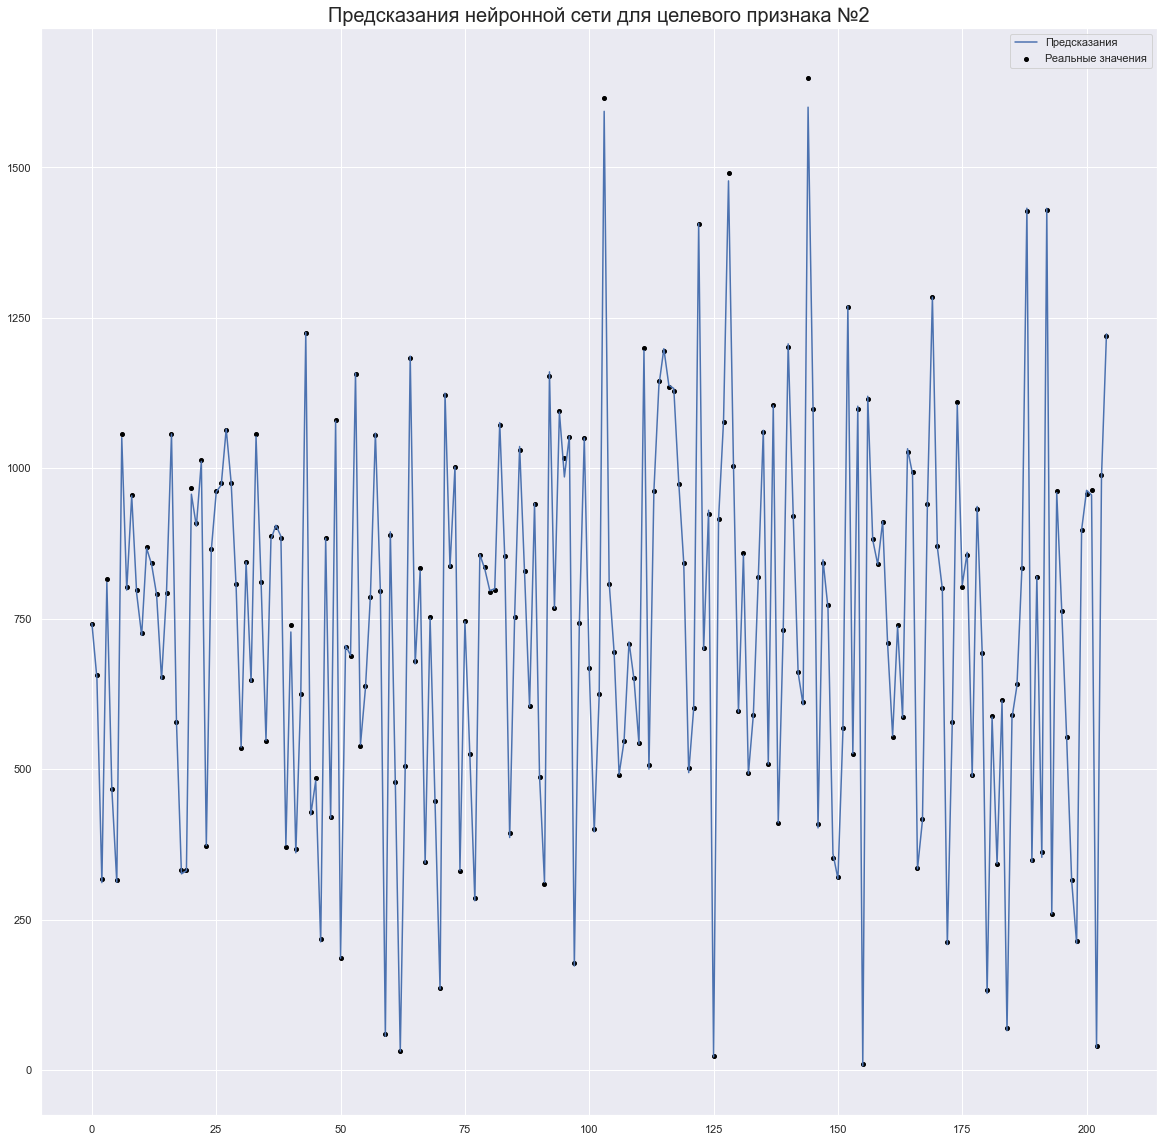

In [111]:
x_ax = range(len(X_test))
plt.scatter(x_ax, y_test_2, s=16, color='black', label="Реальные значения")
plt.plot(x_ax, y2pred_neuro, label="Предсказания")


plt.legend()
plt.title('Предсказания нейронной сети для целевого признака №2', fontsize=20);

## Вывод <a id="conclusion"></a>

In [110]:
result_data = [
    ['Модуль упругости при растяжении, ГПа', 'Модель градиентного бустинга LightGBM',
     '{:.3f}'.format(rmse1_lgbm), '{:.3f}'.format(dummy_rmse[0])],
    ['Модуль упругости, ГПа', 'Нейронная сеть',
     '{:.2f}'.format(rmse2_neuro), '{:.2f}'.format(dummy_rmse[1])],
    ['Соотношение матрица-наполнитель', 'Модель градиентного бустинга LightGBM',
     '{:.3f}'.format(rmse3_lgbm), '{:.3f}'.format(dummy_rmse[2])],
]
result_columns = ['Целевой признак', 'Модель', 'Лучшее значение RMSE', 'Значения константной модели']
results = pd.DataFrame(data=result_data, columns=result_columns)
results.index += 1 
results

,Целевой признак,Модель,Лучшее значение RMSE,Значения константной модели
1,"Модуль упругости при растяжении, ГПа",Модель градиентного бустинга LightGBM,3.428,3.429
2,"Модуль упругости, ГПа",Нейронная сеть,5.67,317.41
3,Соотношение матрица-наполнитель,Модель градиентного бустинга LightGBM,0.954,0.953


Для целевых признаков 'Модуль упругости' и 'Модуль упругости при растяжении' нам удалось обучить модели, предсказывающие необходимые целевые признаки с точностью выше константных моделей. Для признака 'Соотношение матрица-наполнитель' удалось обучить модель, предсказывающую значения с точностью, максимально близкой к точности константной модели.